# Portfolio with the Maximum Calmar Ratio for the Metal Sector 

In [1]:
from pandas_datareader import data
from datetime import datetime
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Establishing Dates
start = "2017-01-01"
end = "2021-1-1"

# Establishing Assets
assets = ['TATASTEEL.NS', 'HINDALCO.NS', 'JSWSTEEL.NS', 'ADANIENT.NS', 'VEDL.NS',
         'COALINDIA.NS', 'SAIL.NS', 'JINDALSTEL.NS', 'NMDC.NS', 'APLAPOLLO.NS']



#252 trading days in a year
N = 252

#1% risk free rate
rf =0.02

# Creating an empty dataframe
df_prices = pd.DataFrame()

# Getting the "Adj Close" data from Yahoo Finance by defining a function
# This function lists the price data as daily percent change 
def YahooData(dataframe, assets_list, start_date, end_date):
    for i in assets_list:
        dataframe[i] = data.DataReader(i, data_source = "yahoo", start=start_date, end=end_date)['Adj Close']
    return dataframe

# Running the function that we just made and saving the results to the DataFrame
df = YahooData(df_prices, assets, start, end)

# Calculating Log Return
df = np.log(df/df.shift(1))

# Dropping the first row because it's N/A
df = df.dropna()

# Viewing df head
df

TATASTEEL.NS  HINDALCO.NS  JSWSTEEL.NS  ADANIENT.NS   VEDL.NS  \
Date                                                                        
2017-01-03     -0.008518     0.000000     0.006252    -0.005212 -0.005901   
2017-01-04      0.005317     0.000315    -0.008580     0.016197 -0.013060   
2017-01-05      0.033589     0.019321     0.074436     0.017203  0.048834   
2017-01-06      0.000596    -0.007746    -0.002565    -0.006337  0.012875   
2017-01-09      0.005823    -0.017255     0.004840     0.001271  0.008421   
...                  ...          ...          ...          ...       ...   
2020-12-28      0.016495     0.012373     0.054074     0.035670  0.003677   
2020-12-29     -0.000712    -0.018087    -0.012494    -0.003367 -0.020708   
2020-12-30      0.012965     0.007611     0.011200    -0.010377  0.012106   
2020-12-31      0.004984     0.013182     0.002845    -0.009547 -0.004019   
2021-01-01     -0.000855    -0.009188     0.006436     0.023901 -0.006215   

            COALINDIA.NS   SAIL.NS  JINDALSTEL.NS   NMDC.NS  APLAPOLLO.NS  
Date                                                                       
2017-01-03      0.017346  0.022517       0.000711  0.015864      0.005908  
2017-01-04      0.002780 -0.021527       0.011299  0.030248      0.015392  
2017-01-05      0.006998  0.027319       0.058640  0.005201      0.002551  
2017-01-06     -0.006835  0.000962      -0.026167  0.007383      0.011821  
2017-01-09     -0.020456  0.006708       0.009472  0.001103     -0.011290  
...                  ...       ...            ...       ...           ...  
2020-12-28      0.010223  0.059599       0.030017  0.022679      0.060918  
2020-12-29     -0.018699  0.008564      -0.029439 -0.018717      0.013326  
2020-12-30      0.003694  0.078252       0.024937  0.018285      0.018973  
2020-12-31     -0.001107  0.060498       0.001878 -0.012590      0.055474  
2021-01-01     -0.000739  0.005384       0.013791  0.016465     -0.026625  

[988 rows x 10 columns]

In [3]:
# Creating 10000 random simulations of each portfolio weight configuration
num_runs = 10000 # number of rows/iterations

# Creating a Matrix with 10000 rows, with each row representing a random portfolio:
    #first 3 columns are Mean Returns, Standard Deviation, and Sortino Ratio
    # remaining columns are each assets random weight within that random portfolio
result = np.zeros((num_runs,(len(assets)+3)))
result

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [4]:
df = df.copy()

for i in range(num_runs):
    
    # randomized weights
    weights = np.array(np.random.random(len(assets))) 
    #Rebalance w/ constraints (SUM of all weights CANNOT BE > 1)
    weights = weights/np.sum(weights)
    
    ### daily return of the portfolio based on a given set of weights
    df['portfolio_ret'] = df.iloc[:,0]*weights[0]+df.iloc[:,1]*weights[1]+df.iloc[:,2]*weights[2]
  
                       
    # Calculating mean
    E = df['portfolio_ret'].mean()
    
    
    # Annualizing mean
    E = E*252
    

    
    # Calculating Drawdown
    def max_drawdown(return_series):
        comp_ret = (return_series+1).cumprod()
        peak = comp_ret.expanding(min_periods=1).max()
        dd = 1 - (comp_ret/peak)
        return dd.max()

    max_drawdown = max_drawdown(df['portfolio_ret'])
   
    #Calculating Annualised Calmar
    Calmar = E / max_drawdown
    
                   
    # Populating the 'result' array with the required values: Mean, Drawdown, Calmar followed by the weights                   
    result[i,0] = E
    result[i,1] = max_drawdown
    result[i,2] = Calmar
    
    for j in range(len(assets)):
        result[i,j+3]= weights[j]

In [5]:
# Converting 'result' into a DataFrame

columns = ['Mean','Drawdown', 'Calmar'] + assets

result = pd.DataFrame(result,columns=columns)
result

Mean  Drawdown    Calmar  TATASTEEL.NS  HINDALCO.NS  JSWSTEEL.NS  \
0     0.045929  0.250301  0.183495      0.042000     0.135675     0.101935   
1     0.046522  0.260321  0.178711      0.115577     0.112312     0.069060   
2     0.095736  0.399735  0.239499      0.259967     0.018159     0.223852   
3     0.028062  0.157528  0.178140      0.028262     0.077518     0.063075   
4     0.022482  0.130103  0.172806      0.069191     0.040579     0.031215   
...        ...       ...       ...           ...          ...          ...   
9995  0.083312  0.387255  0.215135      0.043422     0.184367     0.232985   
9996  0.056927  0.273516  0.208130      0.080410     0.089261     0.144082   
9997  0.030501  0.155828  0.195734      0.060177     0.042142     0.069107   
9998  0.036901  0.249317  0.148009      0.000408     0.210727     0.057028   
9999  0.049466  0.257841  0.191848      0.150383     0.071308     0.077895   

      ADANIENT.NS   VEDL.NS  COALINDIA.NS   SAIL.NS  JINDALSTEL.NS   NMDC.NS  \
0        0.077730  0.102731      0.105458  0.126280       0.058882  0.098209   
1        0.159514  0.090343      0.131247  0.010191       0.124181  0.081196   
2        0.158670  0.067370      0.018937  0.105415       0.047448  0.095735   
3        0.084323  0.108414      0.088748  0.065259       0.142649  0.194105   
4        0.166146  0.015360      0.134718  0.056651       0.141277  0.167055   
...           ...       ...           ...       ...            ...       ...   
9995     0.041009  0.016196      0.039552  0.025539       0.230537  0.092632   
9996     0.089891  0.004115      0.179398  0.053188       0.176554  0.053027   
9997     0.040211  0.188788      0.088107  0.210761       0.089403  0.019993   
9998     0.054555  0.108410      0.031096  0.127057       0.225294  0.012267   
9999     0.118503  0.115945      0.177032  0.156301       0.007743  0.061024   

      APLAPOLLO.NS  
0         0.151099  
1         0.106379  
2         0.004446  
3         0.147646  
4         0.177808  
...            ...  
9995      0.093762  
9996      0.130074  
9997      0.191311  
9998      0.173158  
9999      0.063867  

[10000 rows x 13 columns]

In [6]:
Max_Calmar = result.iloc[result['Calmar'].idxmax()]
Max_Calmar

Mean             0.071932
Drawdown         0.281240
Calmar           0.255768
TATASTEEL.NS     0.007009
HINDALCO.NS      0.008039
JSWSTEEL.NS      0.287918
ADANIENT.NS      0.050381
VEDL.NS          0.031375
COALINDIA.NS     0.225464
SAIL.NS          0.095289
JINDALSTEL.NS    0.162633
NMDC.NS          0.116205
APLAPOLLO.NS     0.015687
Name: 7010, dtype: float64

In [7]:
Min_Drawdown = result.iloc[result['Drawdown'].idxmin()]
Min_Drawdown

Mean             0.002140
Drawdown         0.011556
Calmar           0.185167
TATASTEEL.NS     0.006161
HINDALCO.NS      0.002031
JSWSTEEL.NS      0.004056
ADANIENT.NS      0.059135
VEDL.NS          0.203764
COALINDIA.NS     0.150778
SAIL.NS          0.181913
JINDALSTEL.NS    0.215245
NMDC.NS          0.015577
APLAPOLLO.NS     0.161340
Name: 4298, dtype: float64

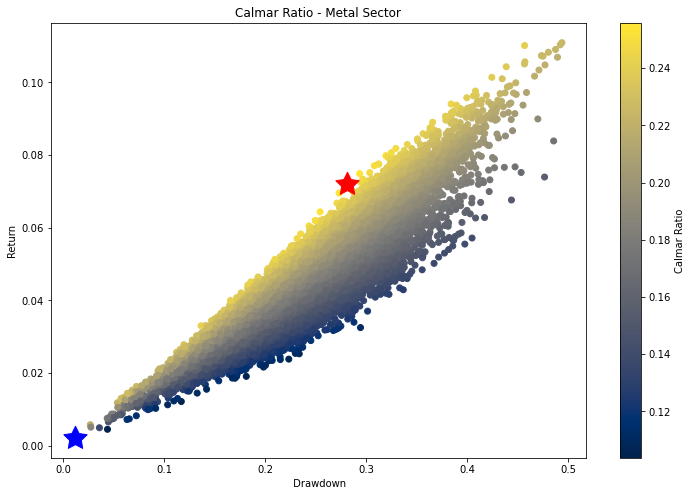

In [8]:
plt.figure(figsize=(12,8))
plt.scatter(x=result['Drawdown'],y=result['Mean'],c=result['Calmar'],cmap='cividis')
plt.colorbar(label='Calmar Ratio')
plt.xlabel(' Drawdown')
plt.ylabel('Return')

plt.title('Calmar Ratio - Metal Sector')
#Plot a red star to highlight position of the portfolio with highest Sortino Ratio
plt.scatter(Max_Calmar[1],Max_Calmar[0],marker=(5,1,0),color='r',s=600)

#Plot a blue star to highlight position of the portfolio with minimum Variance
plt.scatter(Min_Drawdown[1],Min_Drawdown[0],marker=(5,1,0),color='b',s=600)
plt.show()